In [4]:
import pandas as pd


df_loyaty = pd.read_csv("loyalty_data.csv",encoding="latin-1")
df_cc = pd.read_csv("cc_data.csv",encoding="latin-1")

print(df_loyaty.head())
print(df_cc.head())

    timestamp             location  price loyaltynum
0  01/06/2014  Brew've Been Served   4.17      L2247
1  01/06/2014  Brew've Been Served   9.60      L9406
2  01/06/2014     Hallowed Grounds  16.53      L8328
3  01/06/2014         Coffee Shack  11.51      L6417
4  01/06/2014     Hallowed Grounds  12.93      L1107
          timestamp             location  price  last4ccnum
0  01/06/2014 07:28  Brew've Been Served  11.34        4795
1  01/06/2014 07:34     Hallowed Grounds  52.22        7108
2  01/06/2014 07:35  Brew've Been Served   8.33        6816
3  01/06/2014 07:36     Hallowed Grounds  16.72        9617
4  01/06/2014 07:37  Brew've Been Served   4.24        7384


In [2]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import pandas as pd

df_cc = pd.read_csv("cc_data.csv",parse_dates=['timestamp'],encoding="latin-1")

df_cc['day'] = df_cc['timestamp'].dt.strftime('%Y-%m-%d')
df_cc['hour'] = df_cc['timestamp'].dt.hour

grouped_data = df_cc.groupby(['location', 'day', 'hour']).size().reset_index(name='visitor_count')


unique_days = sorted(grouped_data['day'].unique())
print(unique_days)



['2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12', '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16', '2014-01-17', '2014-01-18', '2014-01-19']


In [29]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load the GPS data from the CSV file
df = pd.read_csv('gps.csv', low_memory=False)[:1000]

# Extract the time component from the Timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Time'] = df['Timestamp'].dt.time

# Load the map image
map_image = plt.imread('Abile2.jpg')

# Define the grid points
x = df['long']
y = df['lat']
z = df['Time'].apply(lambda x: x.hour)

# Create a scatter plot with the map image
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=5,
        color=z,
        colorscale='Jet',
        opacity=1,
        symbol='square',
        sizemode='diameter'
    ),
    hovertemplate='Longitude: %{x}<br>Latitude: %{y}<br>Time: %{marker.color}<extra></extra>'
))

# Set the layout and axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Time'
    )
)

# Show the plot
fig.show()


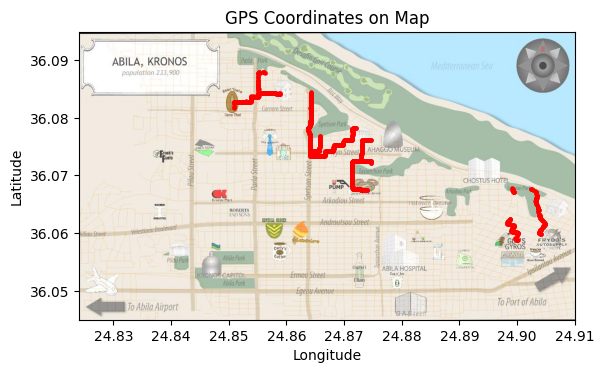

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the GPS data from the CSV file
df = pd.read_csv('gps.csv', low_memory=False)

# Filter the DataFrame for timestamp "01/06/2014"
df_filtered = df[:1000]

# Load the map image
map_image = mpimg.imread('Abile2.jpg')

# Load the spatial referencing information from the .jgw file
jgw_file = 'Abile2.jgw'
with open(jgw_file) as f:
    a, b, c, d, e, f = [float(line.strip()) for line in f]

# Plot the map image with correct spatial referencing
extent = [e, e + a * map_image.shape[1], f + d * map_image.shape[0], f]
plt.imshow(map_image, extent=extent)

# Plot the GPS points on the map
plt.scatter(df_filtered['long'], df_filtered['lat'], color='red', marker='o', s=5)

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Coordinates on Map')

# Show the plot
plt.show()


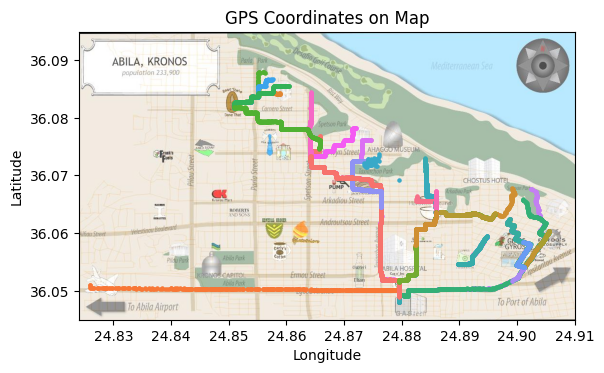

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

# Load the GPS data from the CSV file
df = pd.read_csv('gps.csv', low_memory=False)

# Filter the DataFrame for timestamp "01/06/2014"
df_filtered = df[:7000]

# Load the map image
map_image = mpimg.imread('Abile2.jpg')

# Load the spatial referencing information from the .jgw file
jgw_file = 'Abile2.jgw'
with open(jgw_file) as f:
    a, b, c, d, e, f = [float(line.strip()) for line in f]

# Plot the map image with correct spatial referencing
extent = [e, e + a * map_image.shape[1], f + d * map_image.shape[0], f]
plt.imshow(map_image, extent=extent)

# Get unique ids
unique_ids = np.unique(df_filtered['id'])

# Create a colormap to map ids to colors
cmap = sns.color_palette("husl", len(unique_ids))
id_to_color = dict(zip(unique_ids, cmap))

# Plot the GPS points on the map with colors based on the "id" column
for _, row in df_filtered.iterrows():
    plt.scatter(row['long'], row['lat'], color=id_to_color[row['id']], marker='o', s=5)

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Coordinates on Map')

# Show the plot
plt.show()


In [63]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('gps.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df = df.head(1000)

fig = go.Figure(data=[go.Scatter3d(
    x=df['long'],
    y=df['lat'],
    z=df['Timestamp'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['id'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Timestamp'),
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=0.1),
        camera=dict(
            up=dict(x=0, y=0, z=1),
            eye=dict(x=-1.5, y=-1.5, z=0.1)
        ),
        bgcolor='rgb(255,255,255)'
    ),
    title='GPS Movement Over Time',
    width=800,
    height=600,
    images=[dict(
        source='Abile2.jpg',
        xref='paper',
        yref='paper',
        x=0,
        y=1,
        sizex=1,
        sizey=1,
        sizing='stretch',
        opacity=0.5,
        layer='below'
    )]
)

fig.show()


/var/folders/7_/cwxkqgrs0192k_wlj6m516tc0000gn/T/ipykernel_53066/2369762369.py:4: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



ValueError: 
    Invalid element(s) received for the 'color' property of scatter3d.marker
        Invalid elements include: ['T', '35', '35', '35', '35', '35', '35', '35', '35', '35']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter3d.marker.colorscale
      - A list or array of any of the above